In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [3]:
excel_file = '/content/SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx'
years = range(2010, 2017)

In [4]:
years[2]

2012

In [8]:
df_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [ ]:
import pandas as pd

excel_file = '/content/SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx'
years = range(2010, 2017)

df_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [ ]:
all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={'Commodity Code': 'Code', 'Commodity Name': 'Name'}, inplace=True)
        df_ind.rename(columns={'Industry Code': 'Code', 'Industry Name': 'Name'}, inplace=True)

        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))

    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [ ]:
all_data[3]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.373,0.072,0.444,NaN,4,3,1,4,1,Commodity,2013
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2013
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2013
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,4,1,Commodity,2013
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.722,0.079,0.801,NaN,4,3,1,4,1,Commodity,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.008,0.000,0.008,NaN,4,3,1,5,1,Industry,2013
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013


In [ ]:
len(all_data)

7

In [ ]:
df = pd.concat(all_data, ignore_index=True)
df.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [ ]:
len(df)

22092

In [ ]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
Unnamed: 7,22092
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0


#Overall Combined Code

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

excel_file = '/content/SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx'
years = range(2010, 2017)
all_data = []

for year in years:
    try:

        sheet_com = f'{year}_Detail_Commodity'
        sheet_ind = f'{year}_Detail_Industry'

        df_com = pd.read_excel(excel_file, sheet_name=sheet_com)
        df_ind = pd.read_excel(excel_file, sheet_name=sheet_ind)


        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)

        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)

        combined_df = pd.concat([df_com, df_ind], ignore_index=True)
        all_data.append(combined_df)

    except Exception as e:
        print(f"[Warning] Skipping year {year} due to error: {e}")

df = pd.concat(all_data, ignore_index=True)

# Explicitly convert categorical columns to string before any NaN handling
for col in ['Substance', 'Unit', 'Source']:
    if col in df.columns:
        df[col] = df[col].astype(str)


print(f"\nTotal Records Combined: {len(df)}")
print(f"\nColumns in Dataset:\n{df.columns.tolist()}")
print(f"\nMissing Values:\n{df.isnull().sum()}")

display(df.head())

threshold = 0.5
null_ratios = df.isnull().mean()
columns_to_drop = null_ratios[null_ratios > threshold].index
df.drop(columns=columns_to_drop, axis=1, inplace=True)

df.fillna(method='ffill', inplace=True)

df.reset_index(drop=True, inplace=True)


Total Records Combined: 22092

Columns in Dataset:
['Code', 'Name', 'Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Unnamed: 7', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins', 'Source', 'Year']

Missing Values:
Code                                                          0
Name                                                          0
Substance                                                     0
Unit                                                          0
Supply Chain Emission Factors without Margins                 0
Margins of Supply Chain Emission Factors                      0
Supply Chain Emission Factors with Margins                    0
Unnamed:

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


/tmp/ipython-input-52-473839009.py:66: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


#Overall Improved Code

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

def load_emission_data(excel_file, start_year=2010, end_year=2016):
    all_data = []
    years = range(start_year, end_year + 1)

    for year in years:
        try:

            df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
            df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

            for df, source in zip([df_com, df_ind], ['Commodity', 'Industry']):
                df['Source'] = source
                df['Year'] = year
                df.columns = df.columns.str.strip()


            df_com.rename(columns={'Commodity Code': 'Code', 'Commodity Name': 'Name'}, inplace=True)
            df_ind.rename(columns={'Industry Code': 'Code', 'Industry Name': 'Name'}, inplace=True)


            combined = pd.concat([df_com, df_ind], ignore_index=True)
            all_data.append(combined)

        except Exception as e:
            print(f"❌ Error processing year {year}: {e}")

    return pd.concat(all_data, ignore_index=True) if all_data else pd.DataFrame()

excel_file = 'SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx'
df = load_emission_data(excel_file)

print(f"✅ Total Rows Loaded: {len(df)}\n")
print("📋 Columns:\n", df.columns.tolist(), "\n")
print("🔍 Missing Values:\n", df.isnull().sum())


✅ Total Rows Loaded: 22092

📋 Columns:
 ['Code', 'Name', 'Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Unnamed: 7', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins', 'Source', 'Year'] 

🔍 Missing Values:
 Code                                                          0
Name                                                          0
Substance                                                     0
Unit                                                          0
Supply Chain Emission Factors without Margins                 0
Margins of Supply Chain Emission Factors                      0
Supply Chain Emission Factors with Margins                    0
Unnamed: 7      

#Week-2

In [12]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   Unnamed: 7                                              0 non-null      float64
 8   DQ ReliabilityScore of Factors witho

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.0,0.000,0.000,3.349
Supply Chain Emission Factors with Margins,22092.0,0.097681,0.288992,0.0,0.0,0.003,0.052,7.290
Unnamed: 7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Year,22092.0,2013.000000,2.000045,2010.0,2011.0,2013.000,2015.000,2016.000


In [14]:
df.isnull().sum()

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
Unnamed: 7,22092
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0


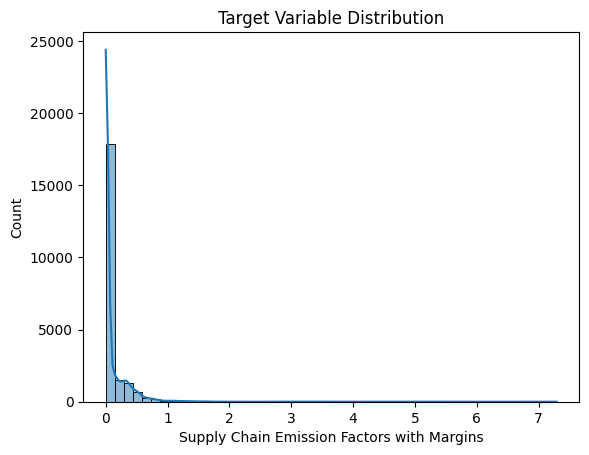

In [ ]:
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50, kde=True)

plt.title('Target Variable Distribution')

plt.show()

In [ ]:
print(df ['Substance'].value_counts())

Substance
0    5523
1    5523
2    5523
3    5523
Name: count, dtype: int64


In [ ]:
print(df['Unit'].value_counts())

Unit
0    16569
1     5523
Name: count, dtype: int64


In [ ]:
print(df['Unit'].unique())

[0 1]


In [ ]:
print(df ['Source'].value_counts())

Source
1    11060
0    11032
Name: count, dtype: int64


In [ ]:
df ['Substance'].unique()

array([0, 1, 2, 3])

In [18]:
substance_map = {
    'carbon dioxide': 0,
    'methane': 1,
    'nitrous oxide': 2,
    'other GHGs': 3
}

In [16]:
df ['Substance']=df ['Substance'].map(substance_map)

NameError: name 'substance_map' is not defined

In [17]:
df ['Substance'].unique()

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [ ]:
print(df['Unit'].unique())

[0 1]


In [ ]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price': 1} # Mapping units

[]

[]

In [ ]:
df ['Unit']=df ['Unit'].map(unit_map)

In [ ]:
source_map={'Commodity': 0, 'Industry': 1}

In [ ]:
df ['Source']=df ['Source'].map(source_map)

In [ ]:
print(df ['Source'].unique())

[nan]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   Unnamed: 7                                              0 non-null      float64
 8   DQ ReliabilityScore of Factors witho

#Overall-Code

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               0 non-null      float64
 1   Unit                                                    0 non-null      float64
 2   Supply Chain Emission Factors w

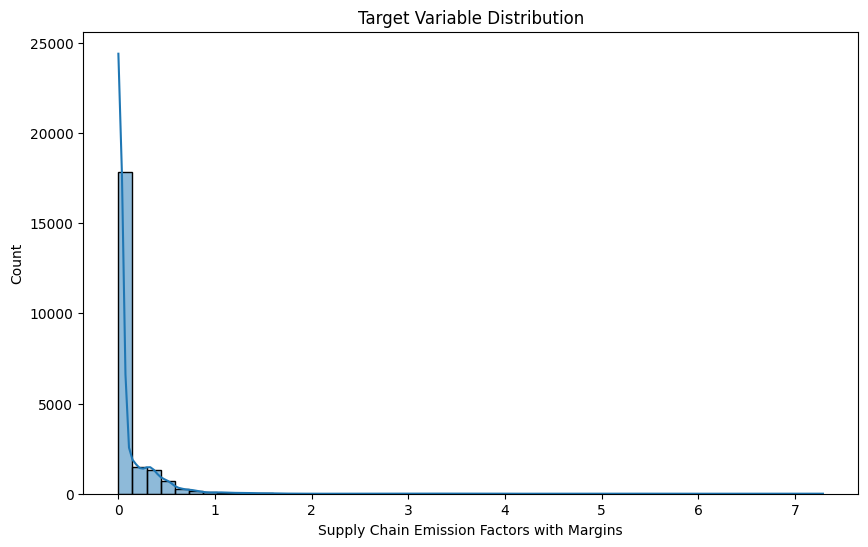

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
[nan]
Series([], Name: count, dtype: int64)
[nan]
[nan]
[nan]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               0 non-null      float64
 1   Unit                                                    0 non-null      float64
 2   Supply Chain Emission Factors without Margins           22092 non-null  float64
 3   Margins of Supply Chain Emission Factors                22092 non-null  float64
 4   Supply Chain Emission Factors with Margins              22092 non-null  float64
 5   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 6   DQ TemporalCorrelation of Factors without Margins       22092 non-nu

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


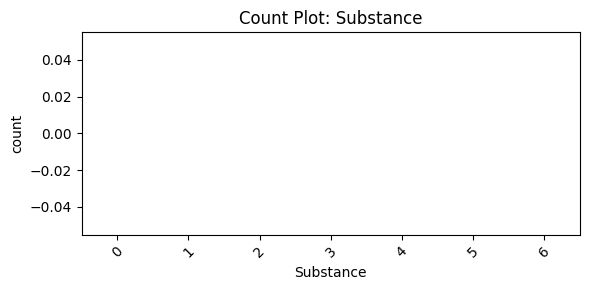

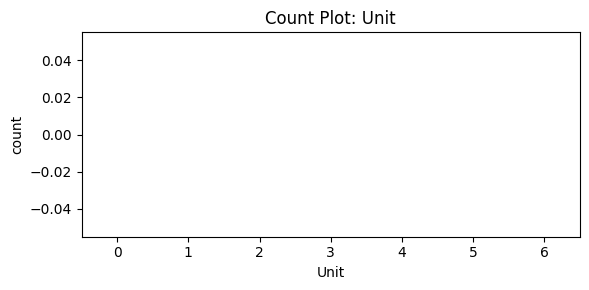

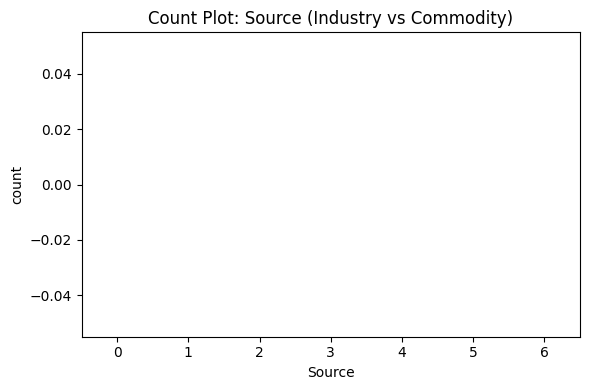

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')
                                                    Substance  Unit  \
Substance                                                 NaN   NaN   
Unit                                                      NaN   NaN   
Supply Chain Emission Factors without Margins             NaN   NaN   
Margins of Supply Chain Emission Factors                  NaN   NaN   
DQ ReliabilityScore of Factors without Margins            NaN   NaN   
DQ TemporalCorrelation of Factors without Margins         NaN   NaN   
DQ GeographicalCorrelation of Factors wit

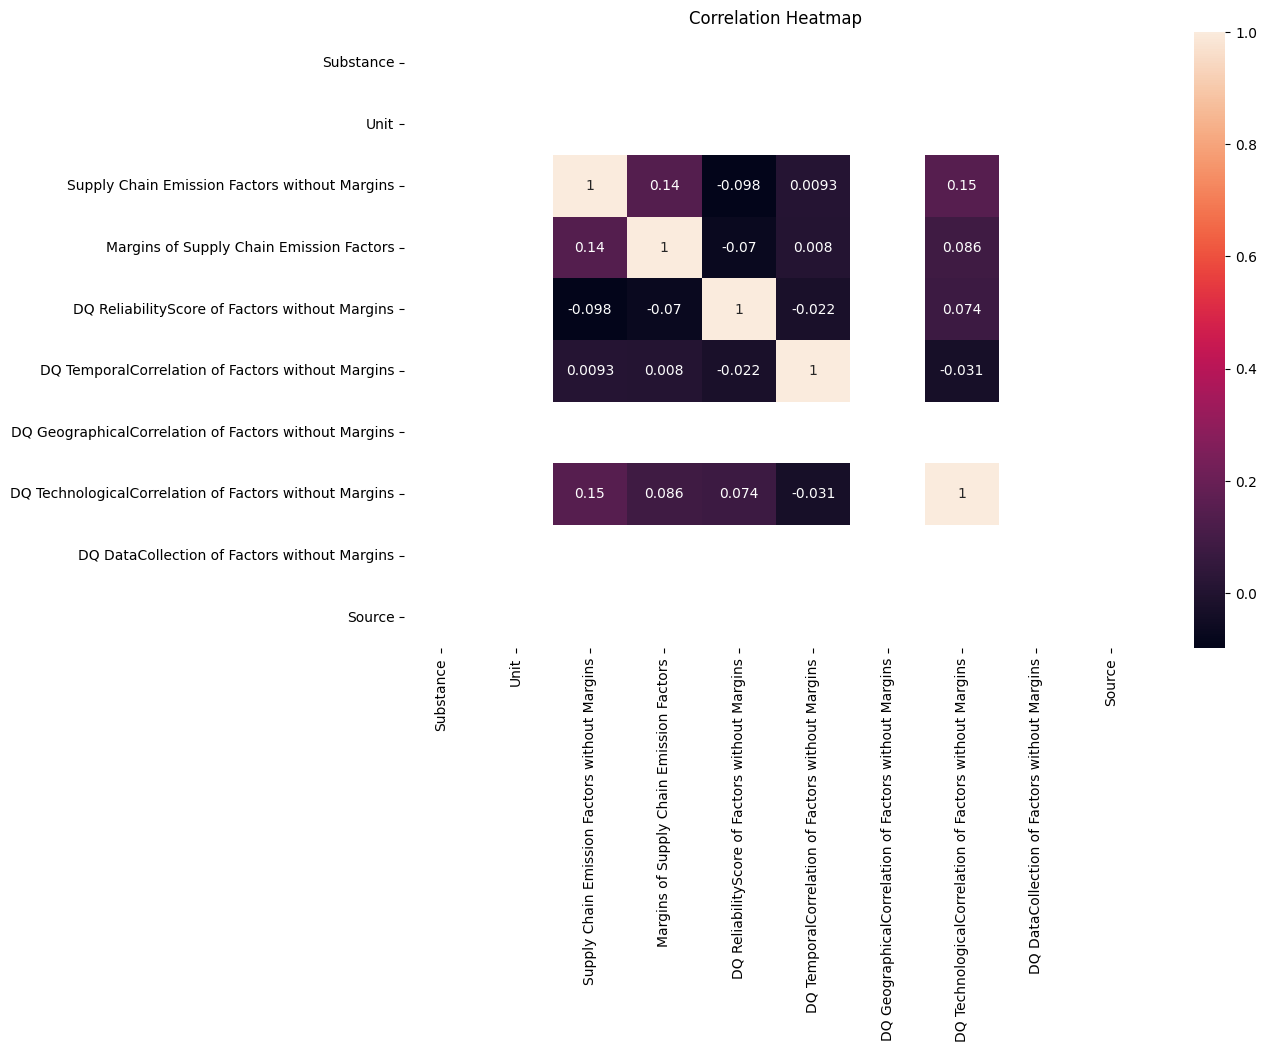

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Use the df created in the previous cell (kc4Ip3gbTtmM)
# df = pd.read_excel('/content/af60b10b8dad38110304.xlsx') # Removed this line

# Remove the redundant drop of 'Unnamed: 7' as it's already dropped in kc4Ip3gbTtmM
# df.drop(columns=['Unnamed: 7'], inplace=True)

print(df.columns)
print(df.info())
print(df.describe().T)
print(df.isnull().sum())

# Target Variable Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50, kde=True)
plt.title('Target Variable Distribution')
plt.show()

# Value Counts
print(df['Substance'].value_counts())
print(df['Unit'].value_counts())
print(df['Unit'].unique())
print(df['Source'].value_counts())
print(df['Substance'].unique())

# Mapping Categorical Variables
substance_map = {
    'carbon dioxide': 0,
    'methane': 1,
    'nitrous oxide': 2,
    'other GHGs': 3
}
df['Substance'] = df['Substance'].map(substance_map)
print(df['Substance'].unique())

unit_map = {
    'kg/2018 USD, purchaser price': 0,
    'kg CO2e/2018 USD, purchaser price': 1
}
df['Unit'] = df['Unit'].map(unit_map)

source_map = {
    'Commodity': 0,
    'Industry': 1
}
df['Source'] = df['Source'].map(source_map)
print(df['Source'].unique())

# Data Exploration
print(df.info())
# print(df.Code.unique()) # Removed this line
# print(df.Name.unique()) # Removed this line
# print(len(df.Name.unique())) # Removed this line

# Top Emitters Analysis
# top_emitters = df[['Name', 'Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values(
#     'Supply Chain Emission Factors with Margins', ascending=False).head(10)
# top_emitters = top_emitters.reset_index()

# # Visualization of Top Emitters
# plt.figure(figsize=(10,6))
# sns.barplot(
#     x='Supply Chain Emission Factors with Margins',
#     y='Name',
#     data=top_emitters,
#     palette='viridis'
# )

# # Add ranking labels
# for i, (value, name) in enumerate(zip(top_emitters['Supply Chain Emission Factors with Margins'], top_emitters.index), start=1):
#     plt.text(value + 0.01, i-1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

# plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold')
# plt.xlabel('Emission Factor (kg CO2e/unit)')
# plt.ylabel('Industry')
# plt.grid(axis='x', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()

# Feature Engineering
df.drop(columns=['Name', 'Code', 'Year', 'Unnamed: 7'], inplace=True, errors='ignore')
print(df.head(1))
print(df.shape)

# Prepare X and y
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])  # Feature set
y = df['Supply Chain Emission Factors with Margins']  # Target variable
print(X.head())
print(y.head())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Count Plots
plt.figure(figsize=(6,3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

# Correlation Heatmap
print(X.columns)
print(X.select_dtypes(include=np.number).corr())
print(X.info())

plt.figure(figsize=(12,8))
sns.heatmap(X.select_dtypes(include=np.number).corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

#Improved-Code

DataFrame Columns: ['Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Unnamed: 7', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins', 'Source']

DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               22092 non-null  int64  
 1   Unit                                                    22092 non-null  int64  
 2   Supply Chain Emission Factors without Margins           22

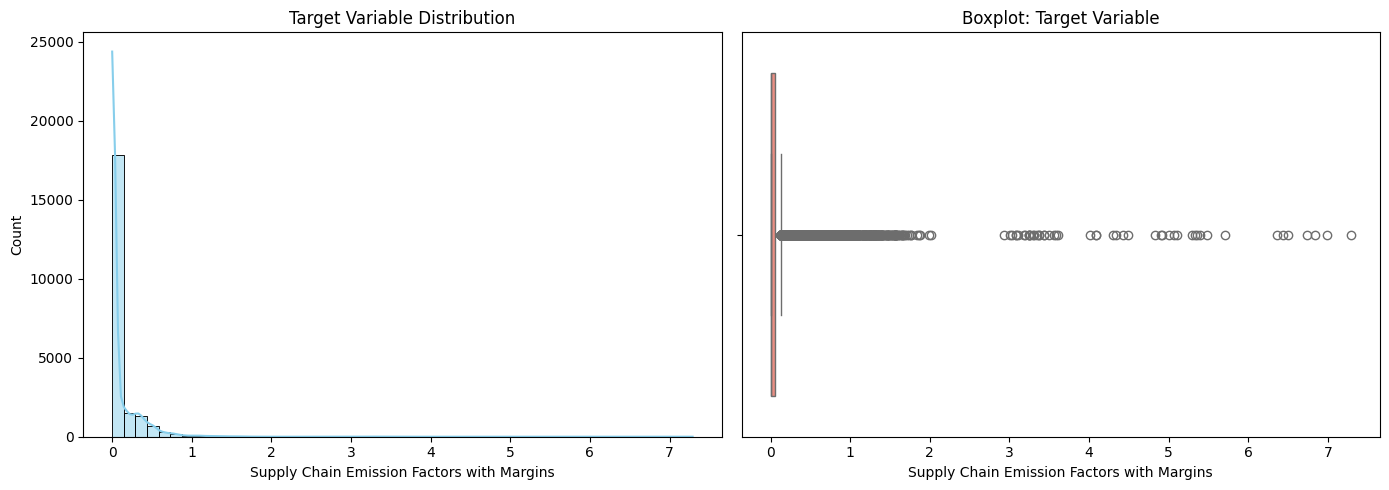


Substance value counts:
 Substance
0    5523
1    5523
2    5523
3    5523
Name: count, dtype: int64
Substance unique values:
 [0 1 2 3]

Unit value counts:
 Unit
0    16569
1     5523
Name: count, dtype: int64
Unit unique values:
 [0 1]

Source value counts:
 Source
1    11060
0    11032
Name: count, dtype: int64
Source unique values:
 [0 1]
Top emitters plot skipped: 'Name' column not found


/tmp/ipython-input-21-1673429376.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=df, palette='coolwarm', estimator=np.mean)
/tmp/ipython-input-21-1673429376.py:97: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.barplot(x=col, y=target_col, data=df, palette='coolwarm', estimator=np.mean)


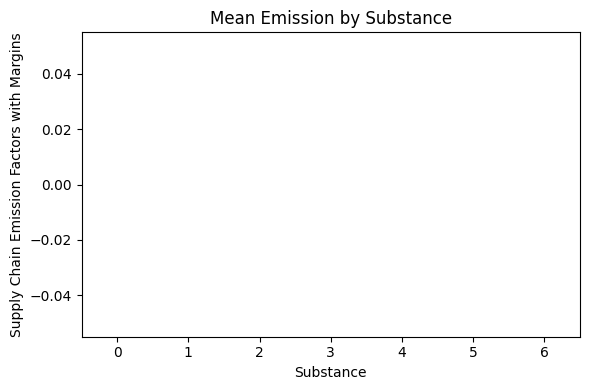

/tmp/ipython-input-21-1673429376.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=df, palette='coolwarm', estimator=np.mean)
/tmp/ipython-input-21-1673429376.py:97: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.barplot(x=col, y=target_col, data=df, palette='coolwarm', estimator=np.mean)


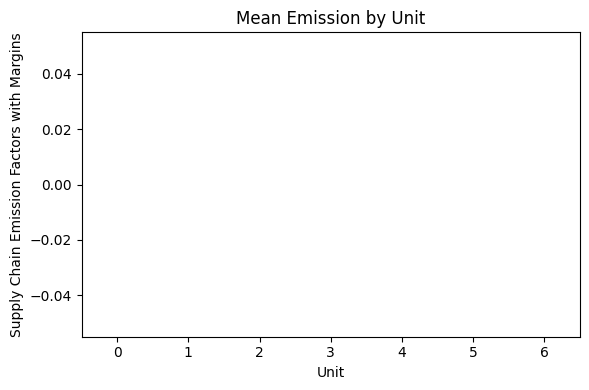

/tmp/ipython-input-21-1673429376.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=df, palette='coolwarm', estimator=np.mean)
/tmp/ipython-input-21-1673429376.py:97: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.barplot(x=col, y=target_col, data=df, palette='coolwarm', estimator=np.mean)


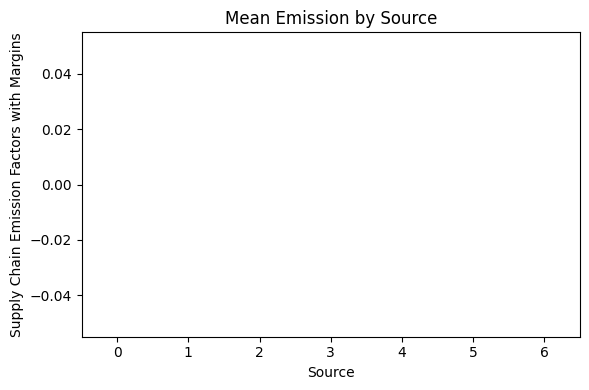

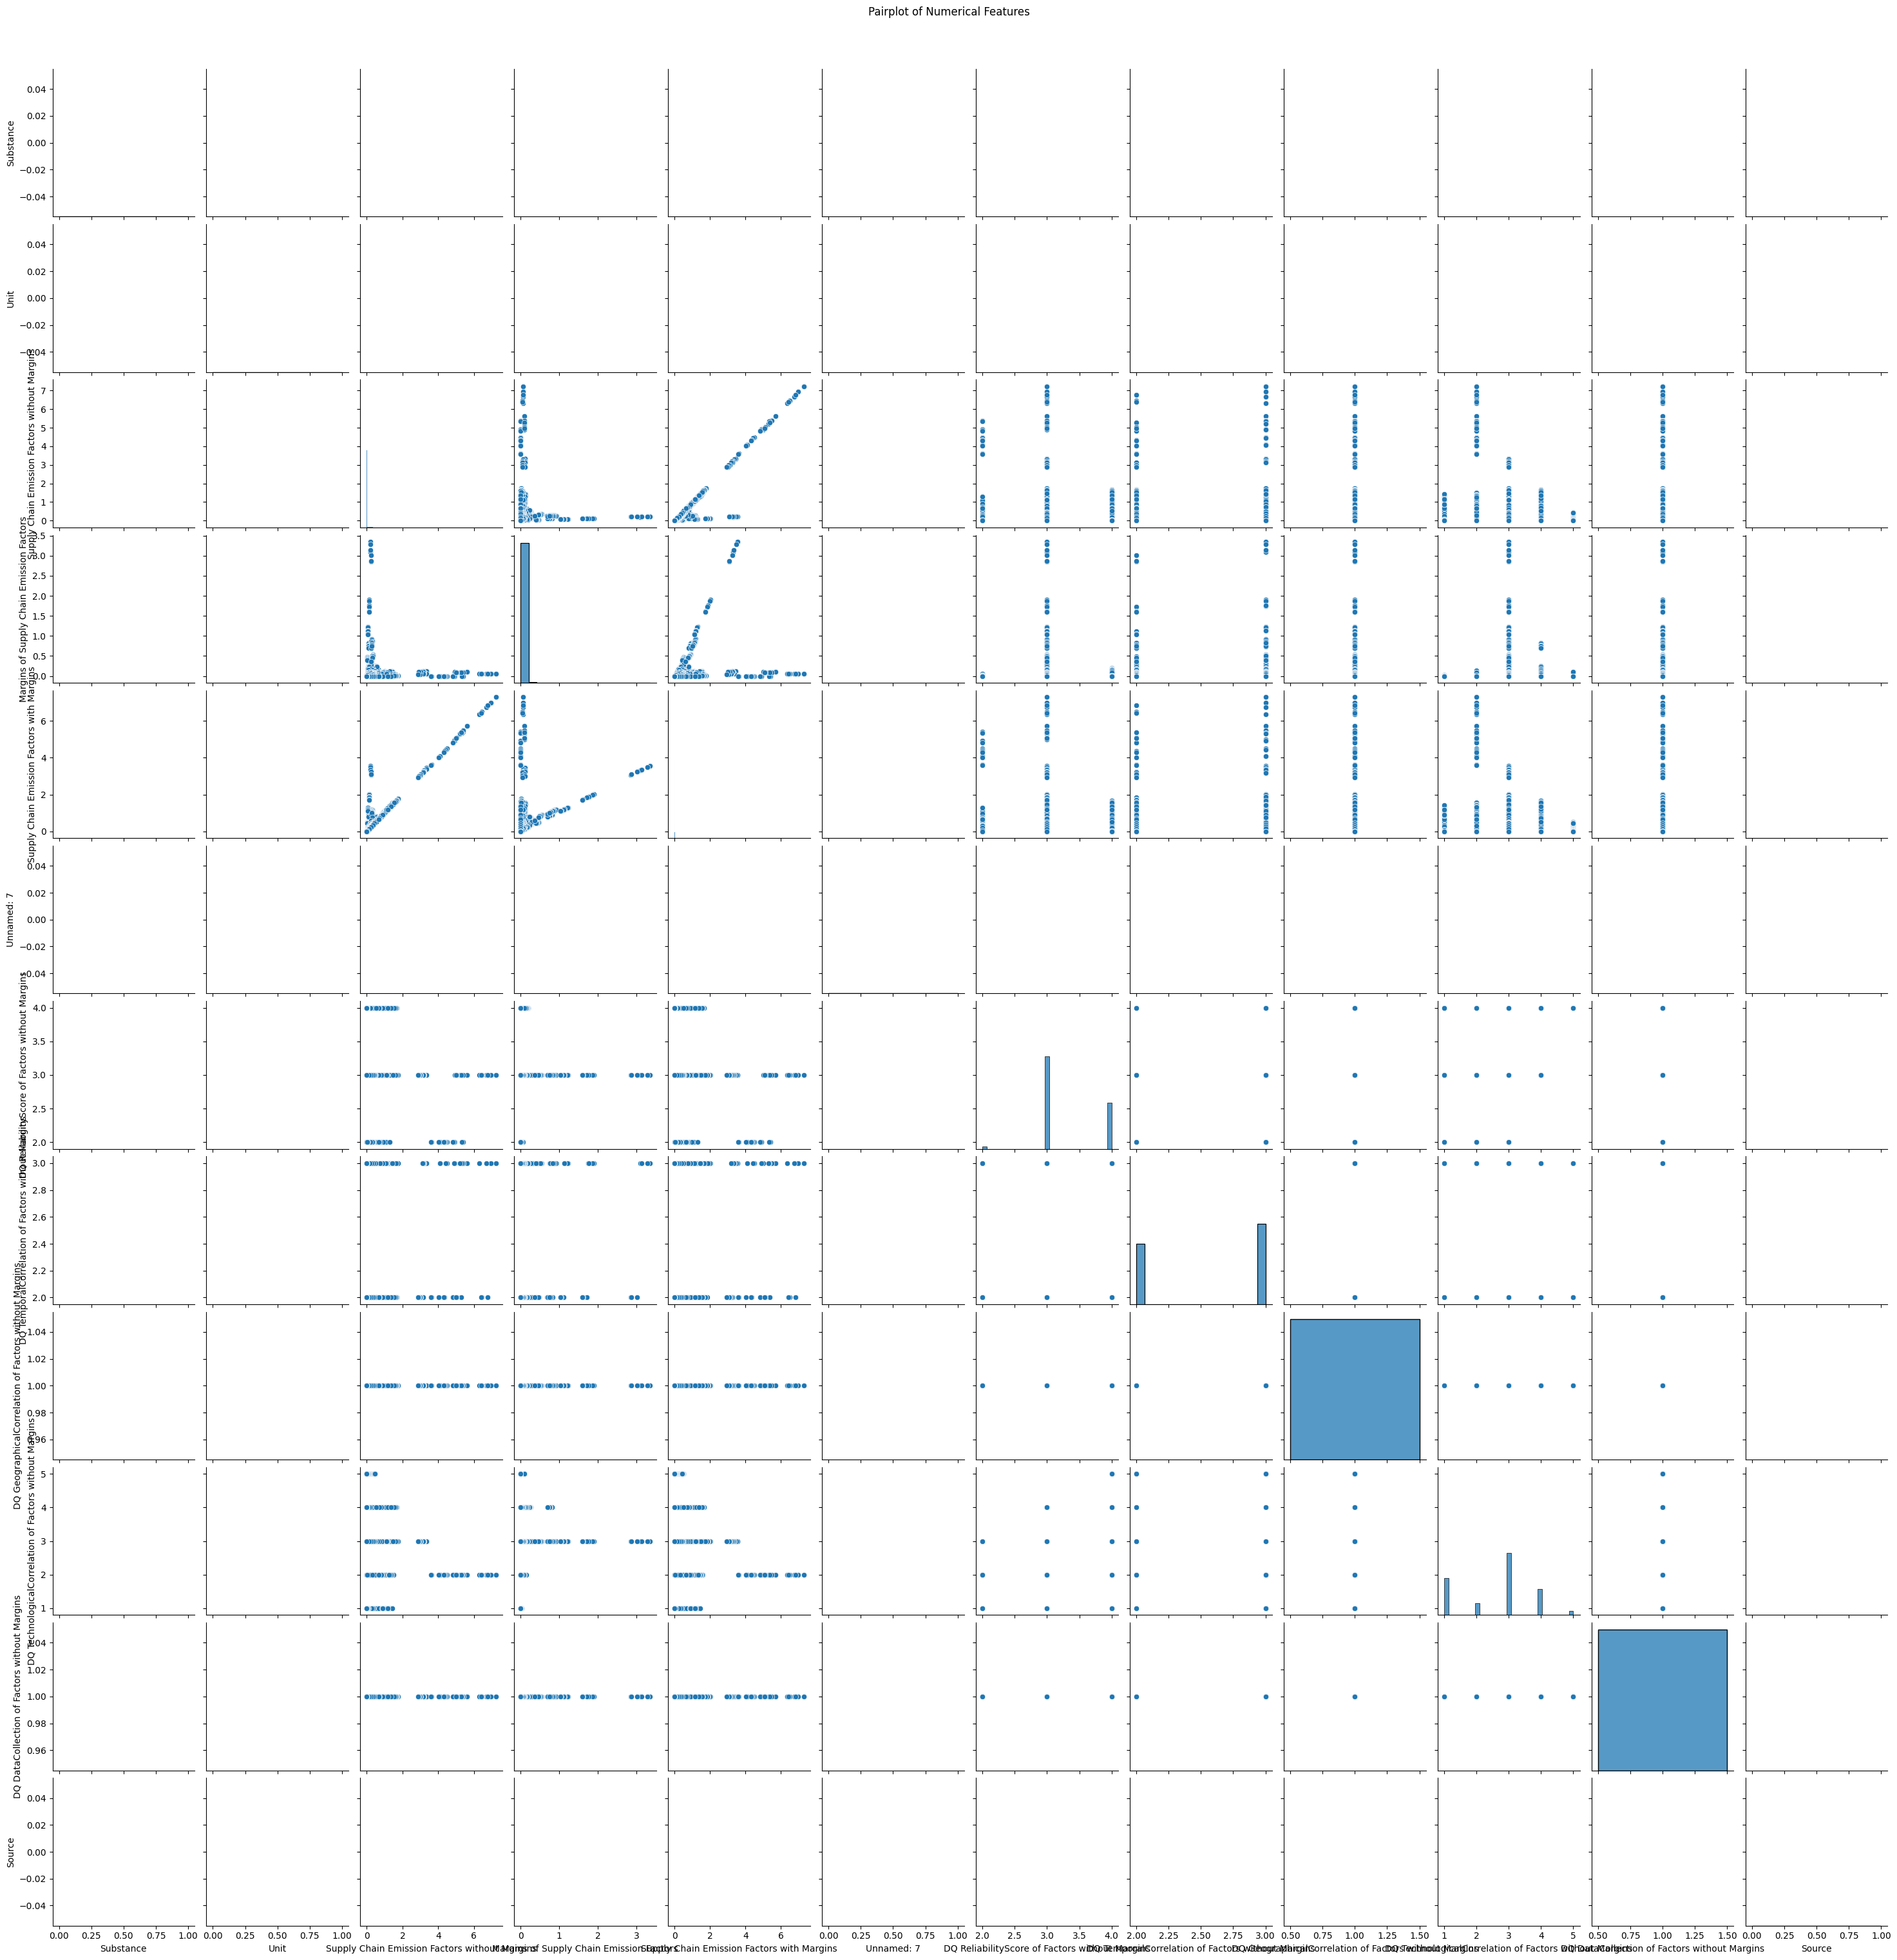


Valid Correlation Matrix Shape: (0, 12)
Any NaNs in matrix: False
Any infs in matrix: False
Not enough valid features for clustering after cleaning correlation matrix.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Target column
target_col = 'Supply Chain Emission Factors with Margins'

# 1. Basic Info
print("DataFrame Columns:", df.columns.tolist())
print("\nDataFrame Info:\n")
print(df.info())
print("\nDescribe:\n", df.describe().T)
print("\nMissing Values:\n", df.isnull().sum())

# 2. Target Variable Distribution
if target_col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(df[target_col], bins=50, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title('Target Variable Distribution')

    sns.boxplot(x=df[target_col], ax=axes[1], color='salmon')
    axes[1].set_title('Boxplot: Target Variable')

    plt.tight_layout()
    plt.show()
else:
    print(f"'{target_col}' column not found in df")

# 3. Categorical Value Checks
for col in ['Substance', 'Unit', 'Source']:
    if col in df.columns:
        print(f"\n{col} value counts:\n", df[col].value_counts())
        print(f"{col} unique values:\n", df[col].unique())

# 4. Categorical Mapping
df['Substance'] = df['Substance'].map({
    'carbon dioxide': 0,
    'methane': 1,
    'nitrous oxide': 2,
    'other GHGs': 3
})

df['Unit'] = df['Unit'].map({
    'kg/2018 USD, purchaser price': 0,
    'kg CO2e/2018 USD, purchaser price': 1
})

df['Source'] = df['Source'].map({
    'Commodity': 0,
    'Industry': 1
})

# 5. Top Emitters Analysis (Before Dropping Name)
if target_col in df.columns and 'Name' in df.columns:
    top_emitters = (
        df[['Name', target_col]]
        .groupby('Name')
        .mean()
        .sort_values(target_col, ascending=False)
        .head(10)
        .reset_index()
    )

    plt.figure(figsize=(10,6))
    sns.barplot(
        x=target_col,
        y='Name',
        data=top_emitters,
        palette='magma'
    )

    for i, (value, name) in enumerate(zip(top_emitters[target_col], top_emitters['Name']), start=1):
        plt.text(value + 0.01, i-1, f'#{i}', va='center', fontsize=11)

    plt.title('Top 10 Emitting Industries')
    plt.xlabel('Emission Factor (kg CO2e/unit)')
    plt.ylabel('Industry')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("Top emitters plot skipped: 'Name' column not found")

# 6. Drop Unnecessary Columns
df.drop(columns=['Name', 'Code', 'Year'], inplace=True, errors='ignore')

# 7. Prepare Features and Target
X = df.drop(columns=[target_col], errors='ignore')
y = df[target_col] if target_col in df.columns else None

# 8. Visualize Category Counts (Barplots)
for col in ['Substance', 'Unit', 'Source']:
    if col in df.columns and target_col in df.columns:
        plt.figure(figsize=(6,4))
        sns.barplot(x=col, y=target_col, data=df, palette='coolwarm', estimator=np.mean)
        plt.title(f'Mean Emission by {col}')
        plt.tight_layout()
        plt.show()

# 9. Pairplot for numeric features
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
if len(numeric_cols) >= 2:
    sns.pairplot(df[numeric_cols])
    plt.suptitle("Pairplot of Numerical Features", y=1.02)
    plt.show()

# 10. Correlation Clustermap (Safe Handling)
if len(numeric_cols) >= 2:
    corr_matrix = df[numeric_cols].corr()

    # Replace inf/-inf with NaN, then drop rows/columns with NaN
    corr_matrix_clean = corr_matrix.replace([np.inf, -np.inf], np.nan).dropna(axis=0, how='any').dropna(axis=1, how='any')

    # Optional Debug
    print("\nValid Correlation Matrix Shape:", corr_matrix_clean.shape)
    print("Any NaNs in matrix:", corr_matrix_clean.isnull().values.any())
    print("Any infs in matrix:", np.isinf(corr_matrix_clean.values).any())

    if corr_matrix_clean.shape[0] >= 2:
        sns.clustermap(corr_matrix_clean, annot=True, cmap='coolwarm', figsize=(10, 8))
        plt.suptitle("Clustermap: Feature Correlation", y=1.02)
        plt.show()
    else:
        print("Not enough valid features for clustering after cleaning correlation matrix.")
else:
    print("Not enough numerical columns for correlation analysis.")


#Week-3

In [22]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Substance,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.0,0.000,0.000,3.349
Unnamed: 7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000


In [23]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [24]:
X_scaled [0].min(), X_scaled [0].max()

(np.float64(nan), np.float64(nan))

In [32]:
np.round(X_scaled.mean()),np.round(X_scaled.std())

(array([nan, nan, -0., -0., nan,  0., -0.,  0., -0.,  0., nan]),
 array([nan, nan,  1.,  1., nan,  1.,  1.,  0.,  1.,  0., nan]))

In [26]:
X. shape

(22092, 11)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape

(17673, 11)

In [29]:
X_test.shape

(4419, 11)

In [33]:
RF_model = RandomForestRegressor (random_state=42)

In [34]:
RF_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
RF_y_pred = RF_model.predict(X_test)

In [36]:
RF_y_pred [:20]

array([2.92870000e-01, 1.00000000e-03, 1.20083292e-03, 1.13818377e-03,
       0.00000000e+00, 4.00000000e-03, 1.66955489e-04, 2.17947618e-03,
       2.00000000e-03, 3.93650000e-01, 0.00000000e+00, 1.40000000e-02,
       4.10953973e-03, 7.00000000e-03, 2.17947618e-03, 2.61707778e-04,
       1.03153773e-03, 3.14090000e-01, 9.00000000e-03, 0.00000000e+00])

In [38]:
RF_mse = mean_squared_error(y_test, RF_y_pred) # Calculating Mean Squared Error (MSE)

RF_rmse = np.sqrt(RF_mse) # Calculating Root Mean Squared Error (RMSE)

#Calculating R? score

RF_r2 = r2_score(y_test, RF_y_pred)

print(f'RMSE: {RF_rmse}')

print(f'R Score: {RF_r2}')

RMSE: 0.005872176221475759
R Score: 0.9993861118077093


In [40]:
from sklearn.linear_model import LinearRegression # Importing Linear Regression model
LR_model = LinearRegression() # Initializing Linear Regression model

#Fitting the Linear Regression model on training data
LR_model.fit(X_train, y_train)

LR_y_pred = LR_model.predict(X_test) # Making predictions on the test set using Linear Regression model

LR_mse = mean_squared_error(y_test, LR_y_pred) # Calculating Mean Squared Error (MSE) for Linear Regression model

LR_rmse = np.sqrt(LR_mse) # Calculating Root Mean Squared Error (RMSE) for Linear Regression model

LR_r2 = r2_score(y_test, LR_y_pred) # Calculating R² score for Linear Regression model

print(f'RMSE: {LR_rmse}')

print(f'R² Score: {LR_r2}')

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [47]:
from sklearn.linear_model import LinearRegression # Importing Linear Regression model
LR_model = LinearRegression() # Initializing Linear Regression model

#Fitting the Linear Regression model on training data
LR_model.fit(X_train, y_train)

LR_y_pred = LR_model.predict(X_test) # Making predictions on the test set using Linear Regression model

LR_mse = mean_squared_error(y_test, LR_y_pred) # Calculating Mean Squared Error (MSE) for Linear Regression model

LR_rmse = np.sqrt(LR_mse) # Calculating Root Mean Squared Error (RMSE) for Linear Regression model

LR_r2 = r2_score(y_test, LR_y_pred) # Calculating R² score for Linear Regression model

print(f'RMSE: {LR_rmse}')

print(f'R² Score: {LR_r2}')

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               0 non-null      float64
 1   Unit                                                    0 non-null      float64
 2   Supply Chain Emission Factors w

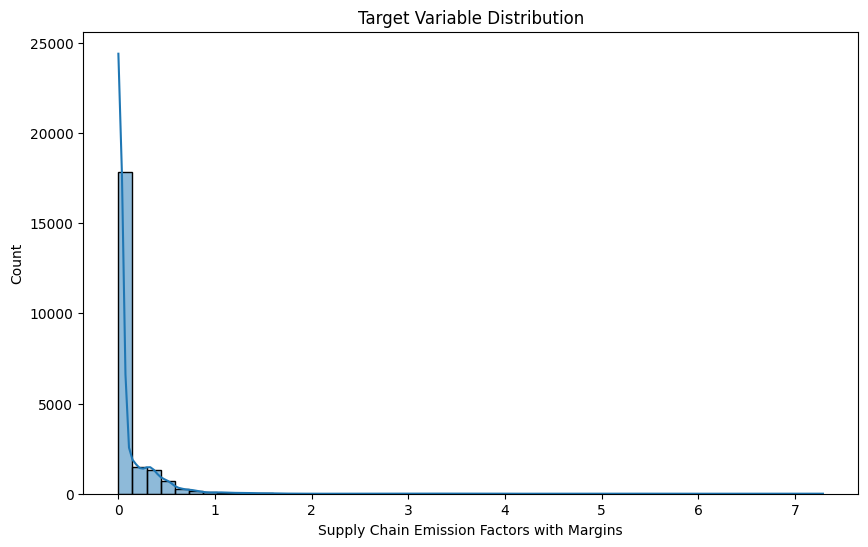

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
[nan]
Series([], Name: count, dtype: int64)
[nan]
[nan]
[nan]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               0 non-null      float64
 1   Unit                                                    0 non-null      float64
 2   Supply Chain Emission Factors without Margins           22092 non-null  float64
 3   Margins of Supply Chain Emission Factors                22092 non-null  float64
 4   Supply Chain Emission Factors with Margins              22092 non-null  float64
 5   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 6   DQ TemporalCorrelation of Factors without Margins       22092 non-nu

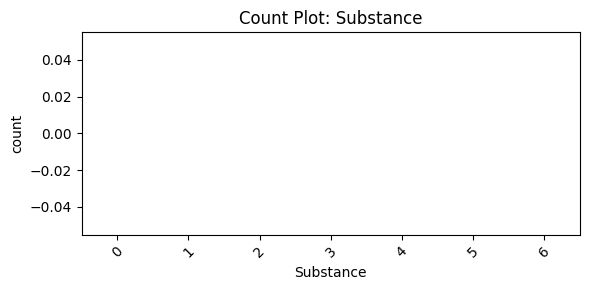

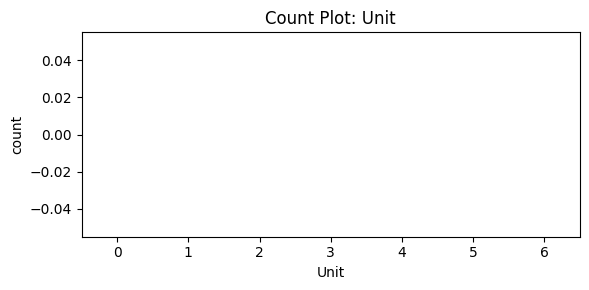

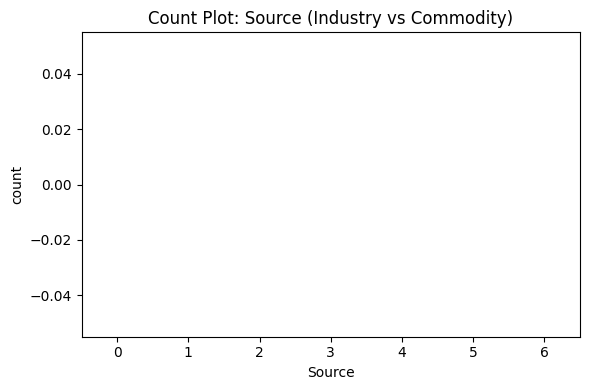

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')
                                                    Substance  Unit  \
Substance                                                 NaN   NaN   
Unit                                                      NaN   NaN   
Supply Chain Emission Factors without Margins             NaN   NaN   
Margins of Supply Chain Emission Factors                  NaN   NaN   
DQ ReliabilityScore of Factors without Margins            NaN   NaN   
DQ TemporalCorrelation of Factors without Margins         NaN   NaN   
DQ GeographicalCorrelation of Factors wit

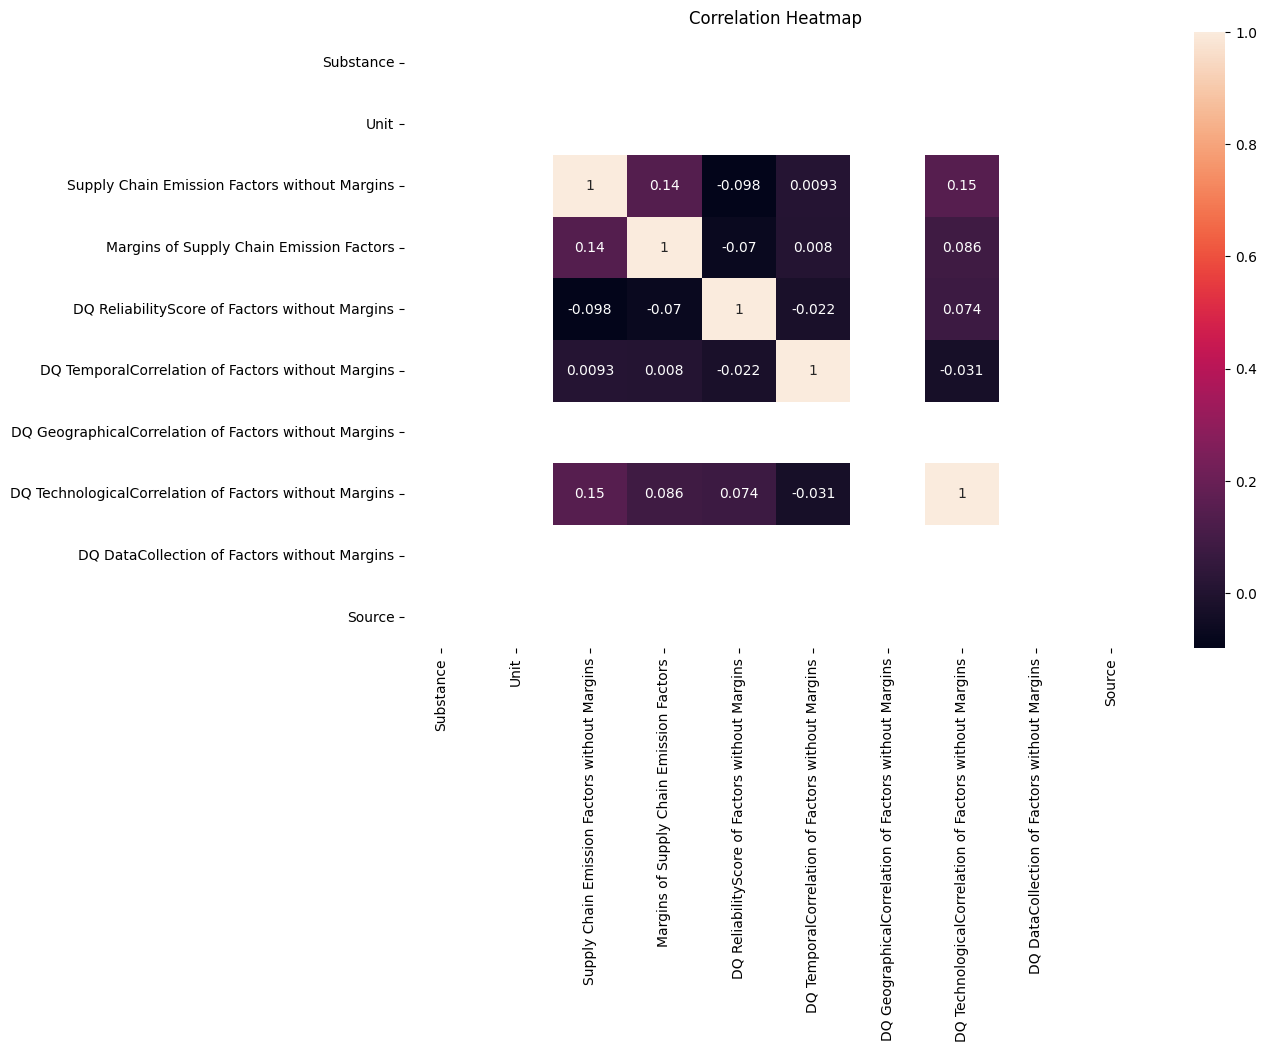

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use the df created in the previous cell (kc4Ip3gbTtmM)
# df = pd.read_excel('/content/af60b10b8dad38110304.xlsx') # Removed this line

# Remove the redundant drop of 'Unnamed: 7' as it's already dropped in kc4Ip3gbTtmM
# df.drop(columns=['Unnamed: 7'], inplace=True)

print(df.columns)
print(df.info())
print(df.describe().T)
print(df.isnull().sum())

# Target Variable Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50, kde=True)
plt.title('Target Variable Distribution')
plt.show()

# Value Counts
print(df['Substance'].value_counts())
print(df['Unit'].value_counts())
print(df['Unit'].unique())
print(df['Source'].value_counts())
print(df['Substance'].unique())

# Mapping Categorical Variables
substance_map = {
    'carbon dioxide': 0,
    'methane': 1,
    'nitrous oxide': 2,
    'other GHGs': 3
}
df['Substance'] = df['Substance'].map(substance_map)
print(df['Substance'].unique())

unit_map = {
    'kg/2018 USD, purchaser price': 0,
    'kg CO2e/2018 USD, purchaser price': 1
}
df['Unit'] = df['Unit'].map(unit_map)

source_map = {
    'Commodity': 0,
    'Industry': 1
}
df['Source'] = df['Source'].map(source_map)
print(df['Source'].unique())

# Data Exploration
print(df.info())
# print(df.Code.unique()) # Removed this line
# print(df.Name.unique()) # Removed this line
# print(len(df.Name.unique())) # Removed this line

# Top Emitters Analysis
# top_emitters = df[['Name', 'Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values(
#     'Supply Chain Emission Factors with Margins', ascending=False).head(10)
# top_emitters = top_emitters.reset_index()

# # Visualization of Top Emitters
# plt.figure(figsize=(10,6))
# sns.barplot(
#     x='Supply Chain Emission Factors with Margins',
#     y='Name',
#     data=top_emitters,
#     palette='viridis'
# )

# # Add ranking labels
# for i, (value, name) in enumerate(zip(top_emitters['Supply Chain Emission Factors with Margins'], top_emitters.index), start=1):
#     plt.text(value + 0.01, i-1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

# plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold')
# plt.xlabel('Emission Factor (kg CO2e/unit)')
# plt.ylabel('Industry')
# plt.grid(axis='x', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()

# Feature Engineering
df.drop(columns=['Name', 'Code', 'Year', 'Unnamed: 7'], inplace=True, errors='ignore')
print(df.head(1))
print(df.shape)

# Prepare X and y
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])  # Feature set
y = df['Supply Chain Emission Factors with Margins']  # Target variable
print(X.head())
print(y.head())

# Count Plots
plt.figure(figsize=(6,3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

# Correlation Heatmap
print(X.columns)
print(X.select_dtypes(include=np.number).corr())
print(X.info())

plt.figure(figsize=(12,8))
sns.heatmap(X.select_dtypes(include=np.number).corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [49]:
from sklearn.linear_model import LinearRegression # Importing Linear Regression model
LR_model = LinearRegression() # Initializing Linear Regression model

#Fitting the Linear Regression model on training data
LR_model.fit(X_train, y_train)

LR_y_pred = LR_model.predict(X_test) # Making predictions on the test set using Linear Regression model

LR_mse = mean_squared_error(y_test, LR_y_pred) # Calculating Mean Squared Error (MSE) for Linear Regression model

LR_rmse = np.sqrt(LR_mse) # Calculating Root Mean Squared Error (RMSE) for Linear Regression model

LR_r2 = r2_score(y_test, LR_y_pred) # Calculating R² score for Linear Regression model

print(f'RMSE: {LR_rmse}')

print(f'R² Score: {LR_r2}')

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [51]:
print(df['Substance'].unique())
print(df['Unit'].unique())
print(df['Source'].unique())

[nan]
[nan]
[nan]


Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   

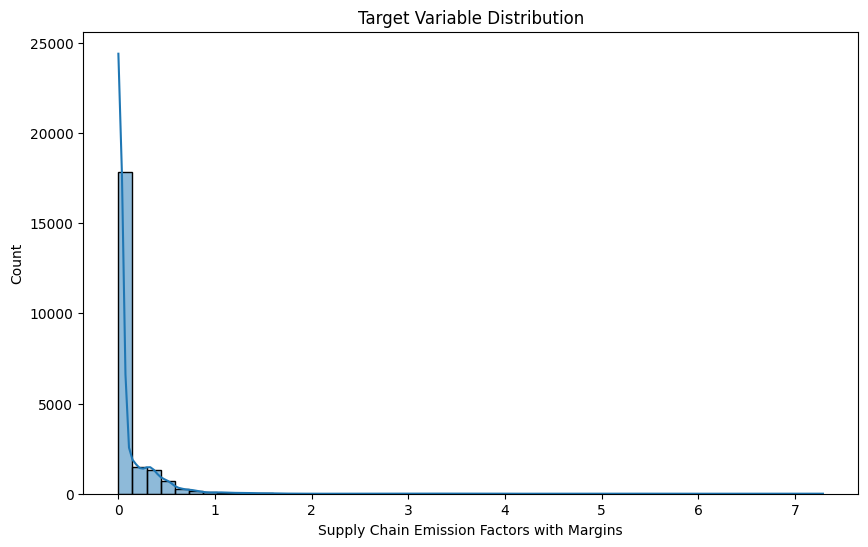

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64
Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64
['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']
Source
Industry     11060
Commodity    11032
Name: count, dtype: int64
['carbon dioxide' 'methane' 'nitrous oxide' 'other GHGs']
[0 1 2 3]
[0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  int64  
 3   Un

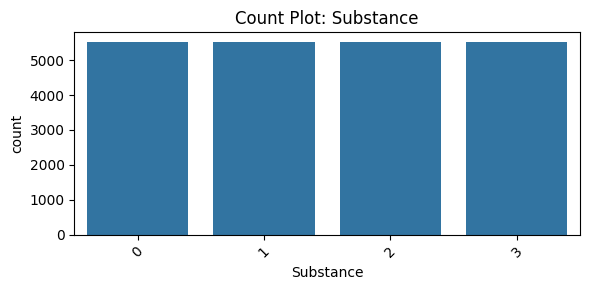

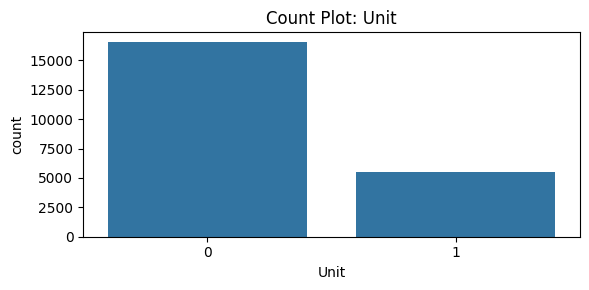

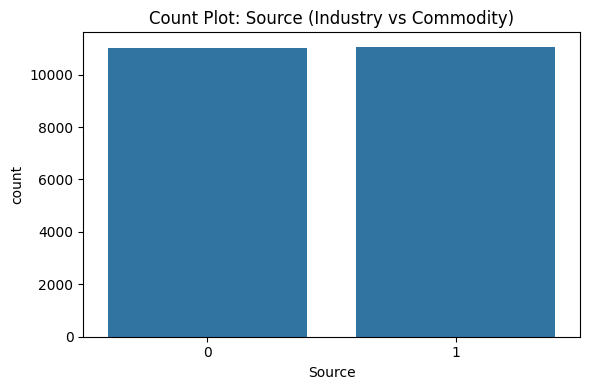

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')
                                                       Substance  \
Substance                                           1.000000e+00   
Unit                                                7.745967e-01   
Supply Chain Emission Factors without Margins      -3.918505e-01   
Margins of Supply Chain Emission Factors           -2.184002e-01   
DQ ReliabilityScore of Factors without Margins      9.509190e-02   
DQ TemporalCorrelation of Factors without Margins  -3.667637e-15   
DQ GeographicalCorrelation of Factors without M...           N

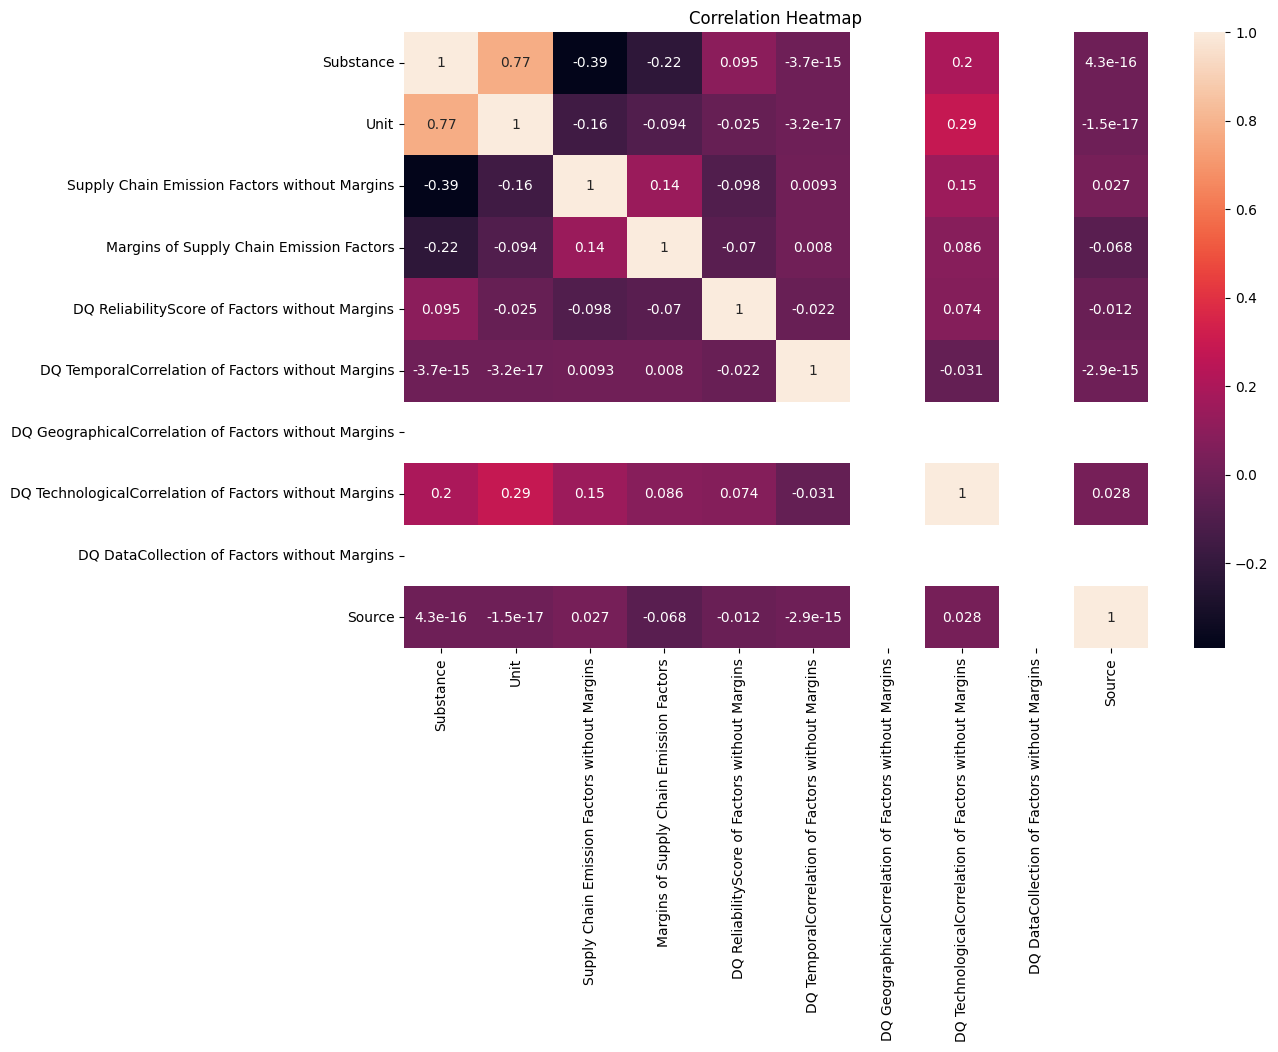

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Use the df created in the previous cell (kc4Ip3gbTtmM)
# df = pd.read_excel('/content/af60b10b8dad38110304.xlsx') # Removed this line

# Remove the redundant drop of 'Unnamed: 7' as it's already dropped in kc4Ip3gbTtmM
# df.drop(columns=['Unnamed: 7'], inplace=True)

print(df.columns)
print(df.info())
print(df.describe().T)
print(df.isnull().sum())

# Target Variable Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50, kde=True)
plt.title('Target Variable Distribution')
plt.show()

# Value Counts
print(df['Substance'].value_counts())
print(df['Unit'].value_counts())
print(df['Unit'].unique())
print(df['Source'].value_counts())
print(df['Substance'].unique())

# Mapping Categorical Variables
substance_map = {
    'carbon dioxide': 0,
    'methane': 1,
    'nitrous oxide': 2,
    'other GHGs': 3
}
df['Substance'] = df['Substance'].map(substance_map)
print(df['Substance'].unique())

unit_map = {
    'kg/2018 USD, purchaser price': 0,
    'kg CO2e/2018 USD, purchaser price': 1
}
df['Unit'] = df['Unit'].map(unit_map)

source_map = {
    'Commodity': 0,
    'Industry': 1
}
df['Source'] = df['Source'].map(source_map)
print(df['Source'].unique())

# Data Exploration
print(df.info())
# print(df.Code.unique()) # Removed this line
# print(df.Name.unique()) # Removed this line
# print(len(df.Name.unique())) # Removed this line

# Top Emitters Analysis
# top_emitters = df[['Name', 'Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values(
#     'Supply Chain Emission Factors with Margins', ascending=False).head(10)
# top_emitters = top_emitters.reset_index()

# # Visualization of Top Emitters
# plt.figure(figsize=(10,6))
# sns.barplot(
#     x='Supply Chain Emission Factors with Margins',
#     y='Name',
#     data=top_emitters,
#     palette='viridis'
# )

# # Add ranking labels
# for i, (value, name) in enumerate(zip(top_emitters['Supply Chain Emission Factors with Margins'], top_emitters.index), start=1):
#     plt.text(value + 0.01, i-1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

# plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold')
# plt.xlabel('Emission Factor (kg CO2e/unit)')
# plt.ylabel('Industry')
# plt.grid(axis='x', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()

# Feature Engineering
df.drop(columns=['Name', 'Code', 'Year', 'Unnamed: 7'], inplace=True, errors='ignore')
print(df.head(1))
print(df.shape)

# Prepare X and y
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])  # Feature set
y = df['Supply Chain Emission Factors with Margins']  # Target variable
print(X.head())
print(y.head())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Count Plots
plt.figure(figsize=(6,3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

# Correlation Heatmap
print(X.columns)
print(X.select_dtypes(include=np.number).corr())
print(X.info())

plt.figure(figsize=(12,8))
sns.heatmap(X.select_dtypes(include=np.number).corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression # Importing Linear Regression model
LR_model = LinearRegression() # Initializing Linear Regression model

#Fitting the Linear Regression model on training data
LR_model.fit(X_train_scaled, y_train)

LR_y_pred = LR_model.predict(X_test_scaled) # Making predictions on the test set using Linear Regression model

LR_mse = mean_squared_error(y_test, LR_y_pred) # Calculating Mean Squared Error (MSE) for Linear Regression model

LR_rmse = np.sqrt(LR_mse) # Calculating Root Mean Squared Error (RMSE) for Linear Regression model

LR_r2 = r2_score(y_test, LR_y_pred) # Calculating R² score for Linear Regression model

print(f'RMSE: {LR_rmse}')

print(f'R² Score: {LR_r2}')

RMSE: 0.0002807379291629386
R² Score: 0.9999985968848819


In [56]:
param_grid = {
'n_estimators': [100, 200],
'max_depth': [None, 10, 20],
'min_samples_split': [2, 5]
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV (RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)

# Fit the grid search model on the training data
grid_search.fit(X_train, y_train)

#Best model from grid search
best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [58]:
# Use the best model to make predictions on the test set

y_pred_best = best_model.predict(X_test)

HP_mse = mean_squared_error(y_test, y_pred_best)

HP_rmse = np.sqrt(HP_mse)

HP_r2 = r2_score(y_test, y_pred_best)

print(f'RMSE: {HP_rmse}')

print(f'R2 Score: {HP_r2}')

RMSE: 0.0059427595621313264
R2 Score: 0.999371265286783


In [61]:
results = {

'Model': ['Random Forest (Default)', 'Linear Regression', 'Random Forest (Tuned)'],

'MSE': [RF_mse, LR_mse, HP_mse],

'RMSE': [RF_rmse, LR_rmse, HP_rmse],

'R2': [RF_r2, LR_r2, HP_r2]

}


#Create a DataFrame to compare the results of different models

comparison_df = pd.DataFrame (results)

print(comparison_df)

                     Model           MSE      RMSE        R2
0  Random Forest (Default)  3.448245e-05  0.005872  0.999386
1        Linear Regression  7.881378e-08  0.000281  0.999999
2    Random Forest (Tuned)  3.531639e-05  0.005943  0.999371


In [62]:
!mkdir models

In [63]:
joblib.dump(best_model, 'models/LR_model.pkl')

#Save the best model

joblib.dump(scaler, 'models/scaler.pkl') # Save

['models/scaler.pkl']